In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

In [52]:
import tensorflow as tf
import os

In [53]:
import cv2
import imghdr

In [54]:
data_dir = 'data' 

In [55]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [56]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [57]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 357 files belonging to 2 classes.


In [68]:
data_iterator = data.as_numpy_iterator()

In [69]:
batch = data_iterator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [71]:
data = data.map(lambda x,y: (x/255, y))

In [72]:
data.as_numpy_iterator().next()

(array([[[[0.8502374 , 0.84631586, 0.826708  ],
          [0.8467759 , 0.8428543 , 0.8232465 ],
          [0.8467431 , 0.84282154, 0.8232137 ],
          ...,
          [0.7954257 , 0.79150414, 0.7718963 ],
          [0.7882353 , 0.78431374, 0.7647059 ],
          [0.7849982 , 0.7810766 , 0.76146877]],
 
         [[0.8435585 , 0.8396369 , 0.8200291 ],
          [0.84578127, 0.8418597 , 0.82225186],
          [0.842019  , 0.83809745, 0.8184896 ],
          ...,
          [0.78616977, 0.7822482 , 0.76264036],
          [0.7887883 , 0.78486675, 0.7652589 ],
          [0.7831423 , 0.77922076, 0.7596129 ]],
 
         [[0.84973025, 0.8458087 , 0.82620084],
          [0.85005873, 0.84613717, 0.8265293 ],
          [0.8442087 , 0.84028715, 0.8206793 ],
          ...,
          [0.7816636 , 0.777742  , 0.7581342 ],
          [0.7882353 , 0.78431374, 0.7647059 ],
          [0.7858992 , 0.78197765, 0.7623698 ]],
 
         ...,
 
         [[0.7650684 , 0.76114684, 0.74153894],
          [0.77050

In [73]:
len(data)

12

In [74]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [75]:
test_size+val_size+train_size

12

In [76]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [77]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [79]:
model = Sequential()

In [80]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [81]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [83]:
logdir='logs'

In [84]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
8/8 [==============================] - 5s 516ms/step - loss: 0.7032 - accuracy: 0.5781 - val_loss: 0.5933 - val_accuracy: 0.6719
Epoch 2/50
8/8 [==============================] - 4s 467ms/step - loss: 0.5809 - accuracy: 0.6719 - val_loss: 0.5789 - val_accuracy: 0.6875
Epoch 3/50
8/8 [==============================] - 4s 453ms/step - loss: 0.4972 - accuracy: 0.7188 - val_loss: 0.4090 - val_accuracy: 0.8750
Epoch 4/50
8/8 [==============================] - 4s 460ms/step - loss: 0.4342 - accuracy: 0.7734 - val_loss: 0.4327 - val_accuracy: 0.8281
Epoch 5/50
8/8 [==============================] - 4s 470ms/step - loss: 0.4104 - accuracy: 0.8438 - val_loss: 0.5007 - val_accuracy: 0.8125
Epoch 6/50
8/8 [==============================] - 4s 452ms/step - loss: 0.3903 - accuracy: 0.8125 - val_loss: 0.3941 - val_accuracy: 0.8281
Epoch 7/50
8/8 [==============================] - 4s 446ms/step - loss: 0.3655 - accuracy: 0.8320 - val_loss: 0.3333 - val_accuracy: 0.8750
Epoch 8/50
8/8 [====

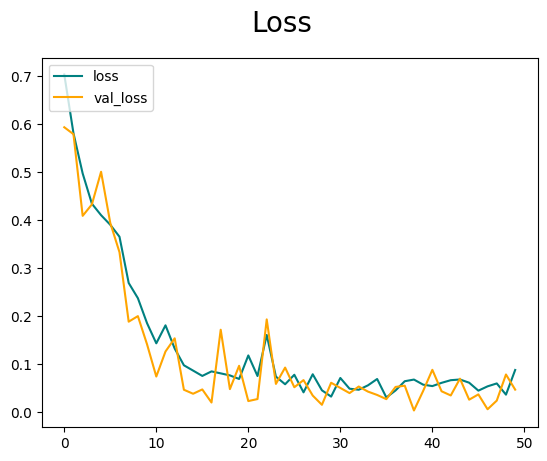

In [86]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

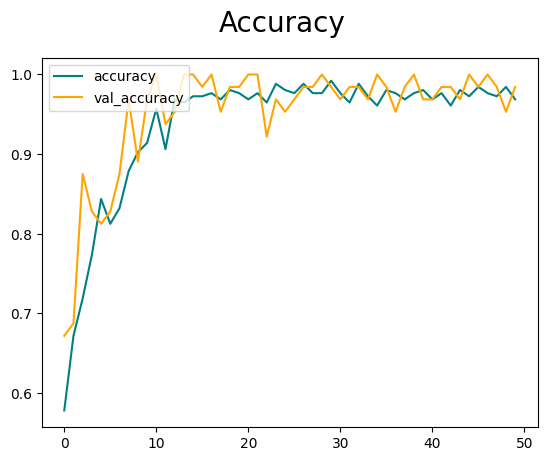

In [87]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [88]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [89]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [91]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95652175, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.972973, shape=(), dtype=float32)


In [92]:
import cv2

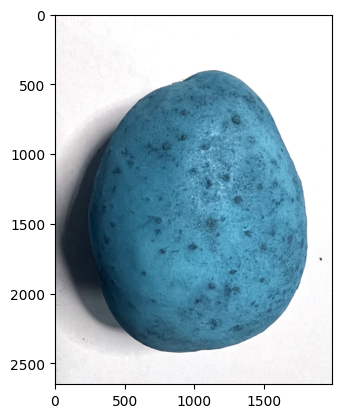

In [202]:
img = cv2.imread('healthy.jpg')
plt.imshow(img)
plt.show()

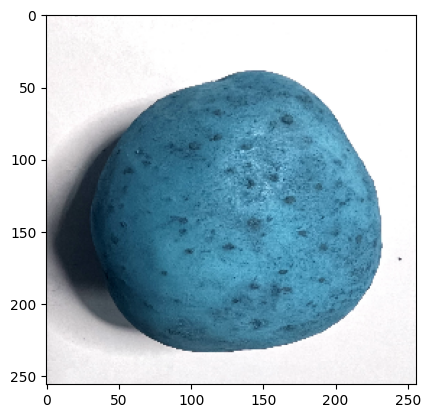

In [203]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [208]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 17ms/step


In [209]:
yhat

array([[0.88322234]], dtype=float32)

In [210]:
if yhat > 0.5: 
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is Diseased')

Predicted class is Healthy


In [169]:
from tensorflow.keras.models import load_model

In [114]:
model.save(os.path.join('models','new50epoch.h5'))

In [193]:
new_model = load_model(os.path.join('models','new50epoch.h5'))

In [204]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [205]:
yhatnew

array([[0.88322234]], dtype=float32)

In [206]:
if yhatnew > 0.65: 
    print(f'Predicted class is Healthy')
    
elif 0.40 <= yhatnew <= 0.45:
    print(f'Predicted class is Diseased')    
else:
    print(f'nothing detected')

Predicted class is Healthy


In [ ]:
import cv2
import time
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import os

In [ ]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

    # Converting into RGB
    frame_array = Image.fromarray(frame, 'RGB')

    # Resizing
    frame_array = frame_array.resize((255,255))
    frame_array = np.array(frame_array)

    # 4-Dimensional Tensor
    frame_array = np.expand_dims(frame_array, axis=0)
    
    prediction = new_model.predict(np.expand_dims(frame_array/255, 0))

 
    
    
    if prediction > 0.5:        
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle(((8, 50), (140, 100)), fill=(0, 0, 255))
        draw.text((10, 50), "ROTTEN", font=font, fill=(255, 255, 255))
        frame = np.array(img_pil)

        
    elif prediction < 0.5:       
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle(((8, 50), (110, 100)), fill="green")
        draw.text((10, 50), "FRESH", font=font, fill=(255, 255, 255))
        frame = np.array(img_pil)
        

    else:
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle(((8, 50), (170, 100)), fill=(0,165,255))
        draw.text((10, 50), "NO FRUIT", font=font, fill=(255, 255, 255))
        frame = np.array(img_pil)
        
        
    # Show the frame
    cv2.imshow("Fresh & Rotten Fruit Detection", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


cap.release()
cv2.destroyAllWindows()
    